Vt= 1.0892413412308786
k= 0.00037875557357082266


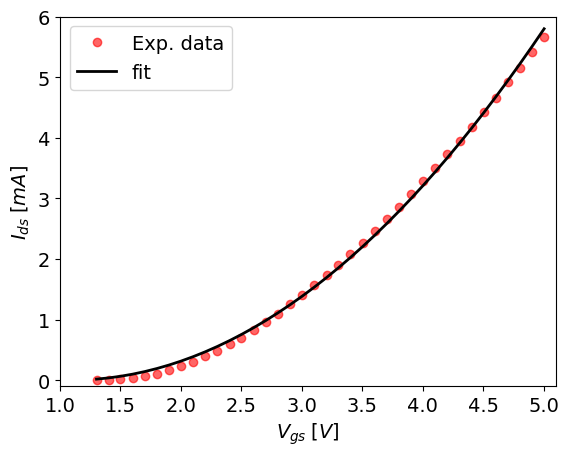

In [ ]:
# Modules you need
import numpy as np, matplotlib.pyplot as plt, pandas as pd, os
from scipy.optimize import curve_fit

# The Vgs-Ids equation
def sqr(x, k, vt):
    return k * (x - vt) ** 2

data = pd.read_csv("data.csv", on_bad_lines="skip")
vgs, Ids = data["vgs"], data["ids"]
vgs, Ids = vgs[:].to_numpy(dtype="float"), Ids[:].to_numpy(dtype="float")

# Fitting function
parameters, covariance = curve_fit(sqr, vgs, Ids)
fit_k, fit_vt = parameters[0], parameters[1]

print("Vt=", fit_vt)
print("k=", fit_k)

# Ploting the fit and Exp. Data (only the acceptable range of function)
fit_y = sqr(vgs, fit_k, fit_vt)
plt.plot(vgs, Ids, "or", label="Exp. data", alpha=0.6)
plt.plot(vgs, fit_y, "-k", label="fit", lw=2)

# This range is based on my experiment your value could be slightly different.
plt.xlim(1, 5.1)
plt.xticks(np.arange(1, 5.5, 0.5), fontsize=14)
plt.ylim(-0.1e-3, 6e-3)
plt.yticks(1e-3 * np.arange(0, 6.5, 1), ["0", "1", "2", "3", "4", "5", "6"], fontsize=14)

plt.xlabel("$V_{gs} \\; [V]$", fontsize=14)
plt.ylabel("$I_{ds} \\; [mA]$", fontsize=14)
plt.legend(fontsize=14)

# Save your result:
plt.savefig('fitting.svg')

plt.show()